# Preprocess plays data for naive model

In [43]:
import pandas as pd
from Preprocessing_v1 import *
from DataLoader import load_data
import matplotlib.pyplot as plt

In [44]:
[games_df, players_df, plays_df, tracking_df] = load_data()

loaded games df
shape: (136, 9)
-----
loaded players df
shape: (1683, 7)
-----
loaded plays df
shape: (12486, 35)
-----
loading tracking frames...


loaded tracking frames
shape: (12187398, 17)
returning 4 frames


In [45]:
plays_df_clean = preprocess_plays_df_naive_models(plays_df, games_df)
plays_df_clean.head()

final plays data shape: (6840, 289)


,gameId,week,playId,ballCarrierId,quarter,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,TARGET,...,possessionTeam_NO,possessionTeam_NYG,possessionTeam_NYJ,possessionTeam_PHI,possessionTeam_PIT,possessionTeam_SEA,possessionTeam_SF,possessionTeam_TB,possessionTeam_TEN,possessionTeam_WAS
0,2022090800,1,3304,52494,4,2,6,10,31,2,...,0,0,0,0,0,0,0,0,0,0
1,2022090800,1,2648,46076,3,2,10,10,17,3,...,0,0,0,0,0,0,0,0,0,0
2,2022090800,1,2072,47857,3,1,10,10,10,1,...,0,0,0,0,0,0,0,0,0,0
3,2022090800,1,2093,46076,3,2,9,10,10,7,...,0,0,0,0,0,0,0,0,0,0
4,2022090800,1,1946,47853,3,1,10,10,10,2,...,0,0,0,0,0,0,0,0,0,0


In [1]:
non_ballCarrier_cols = [col for col in plays_df_clean.columns if "ballCarrier" not in col]
plays_df_clean[non_ballCarrier_cols].dtypes

NameError: name 'plays_df_clean' is not defined

## Data exploration

(array([   5.,   24.,  147.,  410., 2143., 1488., 1278.,  453.,  340.,
         143.,  146.,   58.,   56.,   27.,   24.,   15.,   15.,    6.,
          11.,    8.]),
 array([-10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,  10. ,
         12.5,  15. ,  17.5,  20. ,  22.5,  25. ,  27.5,  30. ,  32.5,
         35. ,  37.5,  40. ]),
 <BarContainer object of 20 artists>)

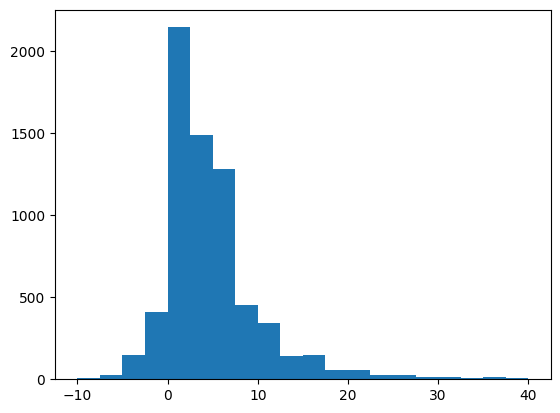

In [47]:
plt.hist(plays_df_clean['TARGET'], bins = 20, range = (-10, 40))

In [48]:
plays_df_clean['TARGET'].describe()

count    6840.000000
mean        4.827193
std         6.689528
min       -26.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        79.000000
Name: TARGET, dtype: float64

In [49]:
len(plays_df_clean[plays_df_clean['TARGET'] < -5])

30

In [50]:
len(plays_df_clean[plays_df_clean['TARGET'] < -2])

177

In [51]:
len(plays_df_clean[plays_df_clean['TARGET'] < -0])

587

In [52]:
len(plays_df_clean[plays_df_clean['TARGET'] > 20])

179

In [53]:
len(plays_df_clean[plays_df_clean['TARGET'] > 30])

73

In [54]:
# Drop observations less than -5 yards and more than 30 yards

In [55]:
plays_df_filtered = plays_df_clean[(plays_df_clean['TARGET'] > -5) & (plays_df_clean['TARGET'] < 30)]
len(plays_df_filtered)

6703

(array([ 291.,  770., 1614., 1488.,  972.,  759.,  231.,  197.,  104.,
          97.,   83.,   31.,   27.,   15.,   24.]),
 array([-4. , -1.8,  0.4,  2.6,  4.8,  7. ,  9.2, 11.4, 13.6, 15.8, 18. ,
        20.2, 22.4, 24.6, 26.8, 29. ]),
 <BarContainer object of 15 artists>)

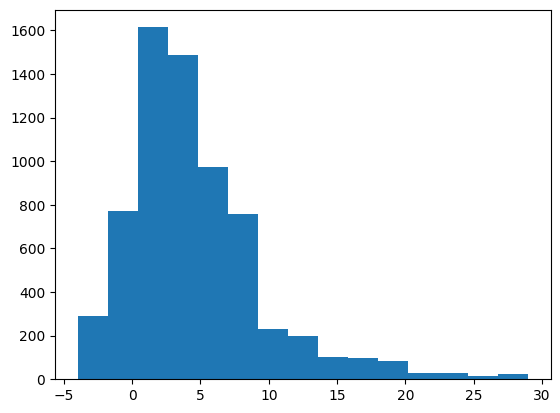

In [56]:
plt.hist(plays_df_filtered['TARGET'], bins = 15)

In [57]:
# Post-processing Bins
# Less than -2
# -2 - 0 
# 0 - 1
# 1 - 2.5
# 2.5 - 5
# 5 - 10
# Greater than 10

In [58]:
len(plays_df_clean[(plays_df_clean['TARGET'] > 10) & (plays_df_clean['TARGET'] < 100)])

777

## Check preprocessing functions

In [59]:
plays_df_clean2 = preprocess_plays_df_naive_models(plays_df, games_df, include_nfl_features=True, bin_ouput=True)
plays_df_clean2['expectedPoints']

final plays data shape: (6840, 289)


0       4.320043
1       2.036072
2       3.154485
3       2.670583
4       0.304974
          ...   
6835    1.646318
6836    1.580271
6837    1.469223
6838    2.727314
6839    0.120898
Name: expectedPoints, Length: 6840, dtype: float64

In [60]:
[col for col in plays_df_clean2.columns if ("ballCarrier" not in col and "Formation" not in col and "Team" not in col)]

['gameId',
 'week',
 'playId',
 'quarter',
 'down',
 'yardsToGo',
 'preSnapHomeScore',
 'preSnapVisitorScore',
 'TARGET',
 'absoluteYardlineNumber',
 'defendersInTheBox',
 'preSnapGameClockSec',
 'expectedPoints']

In [61]:
plays_df_clean2['TARGET']

0       3
1       4
2       2
3       5
4       3
       ..
6835    5
6836    6
6837    3
6838    4
6839    1
Name: TARGET, Length: 6840, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [62]:
plays_df_clean['TARGET']

0        2
1        3
2        1
3        7
4        2
        ..
6835    10
6836    18
6837     2
6838     5
6839    -1
Name: TARGET, Length: 6840, dtype: int64

(array([1.000e+00, 2.900e+01, 4.765e+03, 1.686e+03, 2.530e+02, 5.300e+01,
        2.300e+01, 1.800e+01, 8.000e+00, 4.000e+00]),
 array([-26. , -15.5,  -5. ,   5.5,  16. ,  26.5,  37. ,  47.5,  58. ,
         68.5,  79. ]),
 <BarContainer object of 10 artists>)

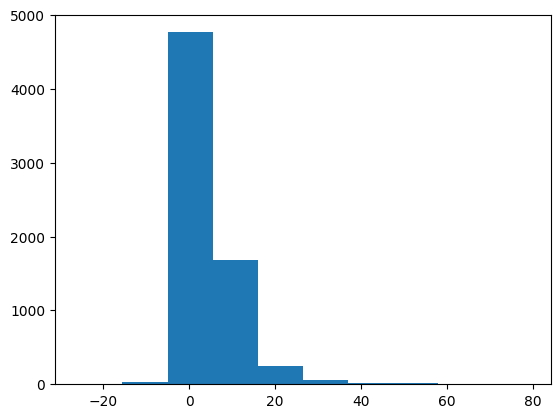

In [66]:
bins = [float('-inf'), -2, 0, 1, 2.5, 5, 10, float('inf')]
plt.hist(plays_df_clean['TARGET'])

(array([ 346.,  770.,    0.,  738.,    0.,  876., 2065.,    0., 1268.,
         777.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

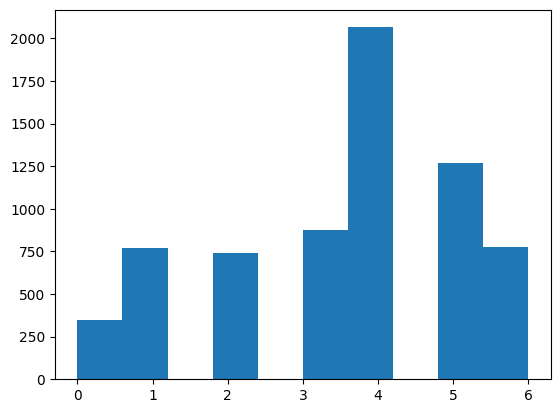

In [70]:
plt.hist(plays_df_clean2['TARGET'])

In [81]:
pd.set_option('display.max_columns', None)
plays_df_clean2[plays_df_clean2.isna().any(axis=1)]

,gameId,week,playId,ballCarrierId,quarter,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,TARGET,absoluteYardlineNumber,defendersInTheBox,preSnapGameClockSec,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_JUMBO,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,offenseFormation_WILDCAT,ballCarrierDisplayName_A.J. Dillon,ballCarrierDisplayName_Aaron Jones,ballCarrierDisplayName_Aaron Rodgers,ballCarrierDisplayName_Alec Ingold,ballCarrierDisplayName_Alexander Mattison,ballCarrierDisplayName_Alvin Kamara,ballCarrierDisplayName_Amon-Ra St. Brown,ballCarrierDisplayName_Andrew Beck,ballCarrierDisplayName_Andy Dalton,ballCarrierDisplayName_Anthony Schwartz,ballCarrierDisplayName_Antonio Gibson,ballCarrierDisplayName_Armani Rogers,ballCarrierDisplayName_Ashton Dulin,ballCarrierDisplayName_Austin Ekeler,ballCarrierDisplayName_Avery Williams,ballCarrierDisplayName_Bailey Zappe,ballCarrierDisplayName_Baker Mayfield,ballCarrierDisplayName_Ben Skowronek,ballCarrierDisplayName_Boston Scott,ballCarrierDisplayName_Brandon Aiyuk,ballCarrierDisplayName_Brandon Allen,ballCarrierDisplayName_Brandon Bolden,ballCarrierDisplayName_Brandon Powell,ballCarrierDisplayName_Braxton Berrios,ballCarrierDisplayName_Breece Hall,ballCarrierDisplayName_Breshad Perriman,ballCarrierDisplayName_Brett Rypien,ballCarrierDisplayName_Brian Robinson,ballCarrierDisplayName_Brock Purdy,ballCarrierDisplayName_C.J. Ham,ballCarrierDisplayName_Caleb Huntley,ballCarrierDisplayName_Cam Akers,ballCarrierDisplayName_Carson Wentz,ballCarrierDisplayName_Case Keenum,ballCarrierDisplayName_Cedrick Wilson,ballCarrierDisplayName_CeeDee Lamb,ballCarrierDisplayName_Chase Claypool,ballCarrierDisplayName_Chase Edmonds,ballCarrierDisplayName_Chigoziem Okonkwo,ballCarrierDisplayName_Chris Godwin,ballCarrierDisplayName_Chris Moore,ballCarrierDisplayName_Christian Kirk,ballCarrierDisplayName_Christian McCaffrey,ballCarrierDisplayName_Christian Watson,ballCarrierDisplayName_Chuba Hubbard,ballCarrierDisplayName_Clyde Edwards-Helaire,ballCarrierDisplayName_Cole Kmet,ballCarrierDisplayName_Cooper Kupp,ballCarrierDisplayName_Cooper Rush,ballCarrierDisplayName_Cordarrelle Patterson,ballCarrierDisplayName_Courtland Sutton,ballCarrierDisplayName_Craig Reynolds,ballCarrierDisplayName_Curtis Samuel,ballCarrierDisplayName_D'Andre Swift,ballCarrierDisplayName_D'Ernest Johnson,ballCarrierDisplayName_D'Onta Foreman,ballCarrierDisplayName_D'Wayne Eskridge,ballCarrierDisplayName_D.J. Moore,ballCarrierDisplayName_D.J. Turner,ballCarrierDisplayName_Dak Prescott,ballCarrierDisplayName_Dalvin Cook,ballCarrierDisplayName_Dameon Pierce,ballCarrierDisplayName_Damien Harris,ballCarrierDisplayName_Damien Williams,ballCarrierDisplayName_Daniel Bellinger,ballCarrierDisplayName_Daniel Jones,ballCarrierDisplayName_Dante Pettis,ballCarrierDisplayName_Dare Ogunbowale,ballCarrierDisplayName_Darnell Mooney,ballCarrierDisplayName_Darrel Williams,ballCarrierDisplayName_Darrell Henderson,ballCarrierDisplayName_Davante Adams,ballCarrierDisplayName_David Montgomery,ballCarrierDisplayName_David Njoku,ballCarrierDisplayName_Davis Mills,ballCarrierDisplayName_DeAndre Carter,ballCarrierDisplayName_DeeJay Dallas,ballCarrierDisplayName_Deebo Samuel,ballCarrierDisplayName_Demetric Felton,ballCarrierDisplayName_Deon Jackson,ballCarrierDisplayName_Derek Carr,ballCarrierDisplayName_Derrick Henry,ballCarrierDisplayName_Devin Duvernay,ballCarrierDisplayName_Devin Singletary,ballCarrierDisplayName_Devine Ozigbo,ballCarrierDisplayName_Diontae Johnson,ballCarrierDisplayName_Donovan Peoples-Jones,ballCarrierDisplayName_Dontrell Hilliard,ballCarrierDisplayName_Durham Smythe,ballCarrierDisplayName_Dwayne Washington,ballCarrierDisplayName_Elijah Mitchell,ballCarrierDisplayName_Elijah Moore,ballCarrierDisplayName_Eno Benjamin,ballCarrierDisplayName_Equanimeous St. Brown,ballCarrierDisplayName_Evan Engram,ballCarrierDisplayName_Ezekiel Elliott,ballCarrierDisplayName_Garrett Wilson,ballCarrierDisplayName_

In [82]:
plays_df_clean2['defendersInTheBox'].describe()

count    6837.000000
mean        6.753839
std         0.958983
min         1.000000
25%         6.000000
50%         7.000000
75%         7.000000
max        11.000000
Name: defendersInTheBox, dtype: float64